# (WIP) 04. PyTorch Custom Datasets

* Bring in custom dataset
* Try TinyVGG on custom dataset (conv layers etc) - https://poloclub.github.io/cnn-explainer/

## TK - What is a custom dataset?

TK - what can a custom dataset

TK - PyTorch modules for custom data

## TK - What we're going to cover

TK - add table of what we're going to cover

## Where can can you get help?

All of the materials for this course [live on GitHub](https://github.com/mrdbourke/pytorch-deep-learning).

If you run into trouble, you can ask a question on the course [GitHub Discussions page](https://github.com/mrdbourke/pytorch-deep-learning/discussions) there too.

And of course, there's the [PyTorch documentation](https://pytorch.org/docs/stable/index.html) and [PyTorch developer forums](https://discuss.pytorch.org/), a very helpful place for all things PyTorch. 

## 0. Importing PyTorch and setting up device-agnostic code

In [94]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'1.11.0'

And now let's follow best practice and setup device-agnostic code.

> **Note:** If you're using Google Colab, and you don't a GPU turned on yet, it's now time to turn one on via `Runtime -> Change runtime type -> Hardware accelerator -> GPU`. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going `Runtime -> Run before`.

In [127]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## TK - 1. Get data

First thing's first we need some data.

And like any good cooking show, some data has already been prepared for us.

We're going to start small.

Because we're not looking to train the biggest model or use the biggest dataset yet.

Machine learning is an iterative process, start small, get something working and increase when necessary.

The data we're going to be using is a subset of the [Food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/).

Food101 is popular computer vision benchmark as it contains 1000 images of 101 different kinds of foods, totaling 101,000 images (75,750 train and 25,250 test).

Can you think of 101 different foods?

Can you think of a computer program to classify 101 foods?

I can.

A machine learning model! 

Specifically, a PyTorch computer vision model like we covered in [notebook 03](https://www.learnpytorch.io/03_pytorch_computer_vision/).

Instead of 101 food classes though, we're going to start with 3: pizza, steak and sushi.

And instead of 1,000 images per class, we're going to start with a random 10% (start small, increase when necessary).

If you'd like to see where the data came from you see the following resources:
* Original [Food101 dataset and paper website](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/).
* [`torchvision.datasets.Food101`](https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html) - the version of the data I downloaded for this notebook.
* [`extras/04_custom_data_creation.ipynb`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) - a notebook I used to format the Food101 dataset to use for this notebook.
* [`data/pizza_steak_sushi.zip`](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi.zip) - the zip archive of pizza, steak and sushi images from Food101, created with the notebook linked above.

Let's write some code to download the formatted data from GitHub.

> **Note:** The dataset we're about to use has been pre-formatted for what we'd like to use it for. However, you'll often have to format your own datasets for whatever problem you're working on. This is a regular practice in the machine learning world.

In [128]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...") 
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.
Unzipping pizza, steak, sushi data...


## TK - 2. Become one with the data

Dataset downloaded!

Time to become one with it.

This is another important step before building a model.

As Abraham Lossfunction said...

TK image - abraham lossfunction tweet

UPTOHERE: inspecting the data/becoming one with it...

TK - what's the standard image format? 

(The numbers below are arbitrary)

TK image - change the below to text/an image so it can be formatted properly in the notebook

```
pizza_steak_sushi/ <- overall dataset folder
    train/ <- training images
        pizza/ <- class name as folder name
            image01.jpeg
            image02.jpeg
            ...
        steak/
            image24.jpeg
            image25.jpeg
            ...
        sushi/
            image37.jpeg
            ...
    test/ <- testing images
        pizza/
            image101.jpeg
            image102.jpeg
            ...
        steak/
            image154.jpeg
            image155.jpeg
            ...
        sushi/
            image167.jpeg
            ...
```

In [5]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


### TK - Visualize an image

Image class: steak
Image height: 512
Image width: 512


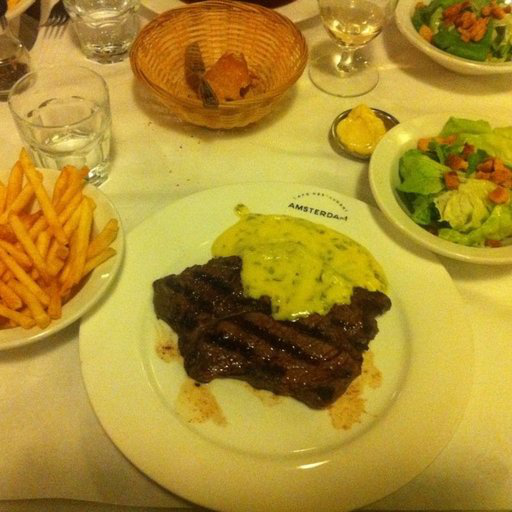

In [7]:
import random
from PIL import Image

# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Get random image path
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

# Open image and print metadata
img = Image.open(random_image_path)
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

TK - We can do the same with matplotlib, except we have to convert the image to a NumPy array first.

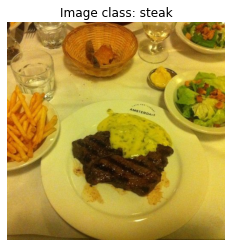

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(np.asarray(img))
plt.title(f"Image class: {image_class}")
plt.axis(False);

## TK - Transforming data 

Now what if we wanted to load our image data into PyTorch?

We've got a few options...

TK - steps to load data
1. setup loading code
2. turn data into tensors

TK - image loading options

1. 
2. 
3. ?? is there a third option or just 2 main ones?

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

TK - add info for where the data came from

In [10]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### Transforming data with `torchvision.transforms`

TK - Let's write a transform to turn:
* Resize the image (from about 512x512 to 64x64, the same shape as the images on the CNN Explainer website)
* Flip our images randomly on the horizontal.
* Turn our image from a PIL image to a PyTorch tensor

In [11]:
# Write transform for image
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

Visualize the transforms...

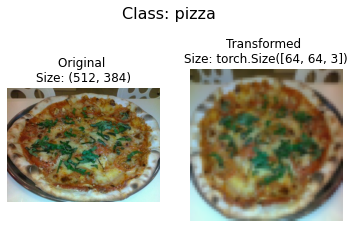

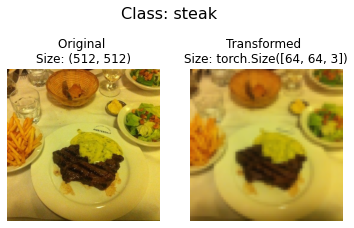

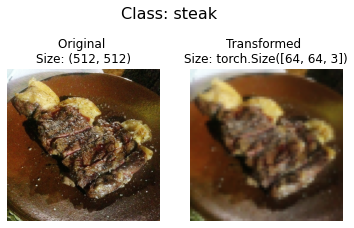

In [12]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=3)

## TK - Option 1: Loading Image Data Using `ImageFolder`

TK - dataloading you use will depend on the data you're working with...

In [13]:
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [14]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [15]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

TK - the images are now a tensor and the labels are in the form of an integer

In [17]:
img, label = train_data[0][0], train_data[0][1]
img, label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0863],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0706],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0196,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [18]:
# Get shapes and datatypes
img.shape, img.dtype, type(label)

(torch.Size([3, 64, 64]), torch.float32, int)

Plot a single image... 

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


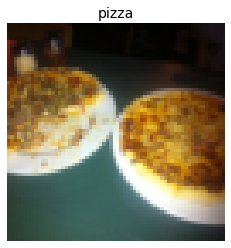

In [19]:
img_permute = img.permute(1, 2, 0) # need to change shape for Matplotlib
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

### TK - Turn loaded images into `DataLoader`'s

In [20]:
# Turn images into data loaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data, batch_size=1, num_workers=1, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, num_workers=1, shuffle=True)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f45f3f35bb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f45f3f35c40>)

In [21]:
img, label = next(iter(train_dataloader))
img.shape, label.shape # batch size is now 1 (try changing the batch_size parameter above)

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## TK - Option 2: Loading Image Data with a Custom `Dataset`

We're going to recreate `torchvision.datasets.ImageFolder()` - https://pytorch.org/vision/stable/datasets.html#torchvision.datasets.ImageFolder

* TK - why use this? - can create your own custom way to load in almost *any* kind of data 
* TK - what's pros and cons? (e.g. more prone to errors but get full customization, have to write more code)

In [22]:
import pathlib
import random
import torch
import os

from PIL import Image
from torchvision import transforms
from typing import Tuple, Dict, List

In [23]:
# Make function to find classes in target directory
# (assumes target directory is in standard image format)
def find_classes(directory: str) -> Tuple[List[str], Dict[str, str]]:
    """Finds the class folder names in a target directory.

    Args:
        directory ([str]): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, str]]: (list_of_class_names, dict(idx: class_name...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [24]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [96]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir, transform=None):
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        self.transform = transform
        self.class_names, self.class_to_idx = find_classes(targ_dir)

    # Make function to load images
    def load_image(self, index) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path) 

    def __len__(self):
        return len(self.paths)
    
    def __getitem__(self, index):
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label
        else:
            return img, class_idx

In [97]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

train_data_custom = ImageFolderCustom(train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(test_dir, transform=test_transforms)
len(train_data_custom), len(test_data_custom)

(225, 75)

In [98]:
train_data_custom.class_names

['pizza', 'steak', 'sushi']

In [99]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

### TK - Create a function to display random images

In [100]:
def display_random_images(dataset, n=10, classes=None, seed=None):
    if n > 10:
        n = 10
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10.")
        
    if seed:
        random.seed(seed)

    # Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # Setup plot
    plt.figure(figsize=(16, 8))

    # Loop through samples and display
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        # Min-max scale
        sample_min, sample_max = targ_image.min(), targ_image.max()
        sample_scaled = (targ_image - sample_min)/(sample_max - sample_min)

        # Adjust for shape [color_channels, height, width] -> [color_channels, height, width]
        sample_adjust = sample_scaled.permute(1, 2, 0)
        # print(sample_adjust)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(sample_adjust)
        plt.axis("off")
        if classes:
            plt.title(classes[targ_label])

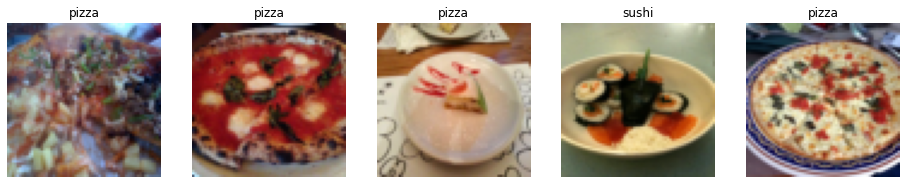

In [101]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data, 
                      n=5, 
                      classes=class_names)

For display purposes, n shouldn't be larger than 10, setting to 10.


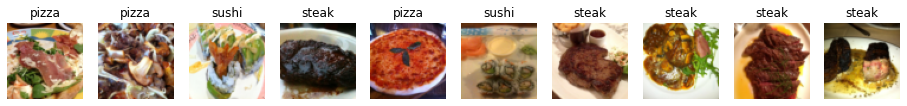

In [102]:
# Test custom dataset images
display_random_images(train_data_custom, 
                      n=12, 
                      classes=class_names)

### TK - Turn custom loaded images into `DataLoader`'s 

TK - what do each of the arguments in the DataLoader do?

In [103]:
# Turn image datasets into data loaders
train_dataloader_custom = DataLoader(train_data_custom, batch_size=1, num_workers=1, shuffle=True)
test_dataloader_custom = DataLoader(test_data_custom, batch_size=1, num_workers=1, shuffle=True)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f45e821f8e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f45e841ae80>)

In [104]:
img, label = next(iter(train_dataloader_custom))
img.shape, label.shape # batch size is now 1 (try changing the batch_size parameter above)

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

## TK Other forms of transforms (data augmentation)

* RandAugment (random) - https://pytorch.org/vision/master/auto_examples/plot_transforms.html#randaugment
* TrivialAugment - https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html#trivialaugmentwide

In [105]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandAugment(num_ops=1, magnitude=5), 
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

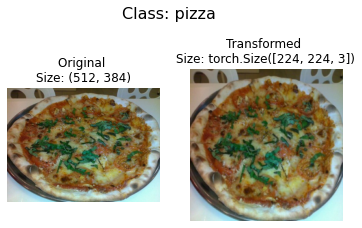

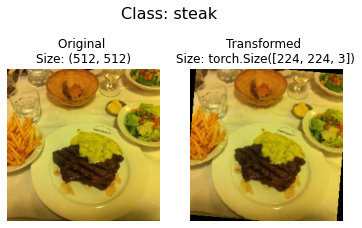

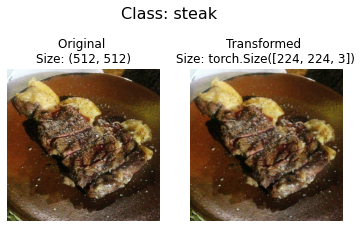

In [106]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(image_paths=image_path_list,
    transform=train_transforms,
    n=3
)

## TK - Model 0: TinyVGG without data augmentation

In [107]:
# Create simple transform
simple_transform = transforms.Compose([ 
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [108]:
# Load data
train_data_simple = datasets.ImageFolder(train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(test_dir, transform=simple_transform)

# Turn data into DataLoaders
train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=32, 
                                     shuffle=True, 
                                     num_workers=8)
test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=32, 
                                    shuffle=True, 
                                    num_workers=8)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7f45e8336460>,
 <torch.utils.data.dataloader.DataLoader at 0x7f45f030af70>)

### Create model

In [109]:
# Same model as CNN explainer website: https://poloclub.github.io/cnn-explainer/
class TinyVGG(nn.Module):
    def __init__(self, input_size, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_size,
                out_channels=hidden_units,
                kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*13*13, # get this by printing the shape of the outputs of each layer
                      out_features=output_shape))
    
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        #return self.classifier(self.conv_block(self.conv_block(x)))

model_0 = TinyVGG(input_size=3, # number of colour channels
    hidden_units=10,
    output_shape=len(train_data.classes)
).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [110]:
# TK - Try a single forward pass...
model_0.eval()
with torch.inference_mode():
    pred = model_0(img.to(device))
pred

tensor([[-0.0298, -0.0394, -0.0101]], device='cuda:0')

In [111]:
# TK - make sure torchinfo can be used in Google Colab
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  --                        --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

### Create train & test functions

* TK - after 04, functionize everything
* TK - make the functions below the same as the previous notebook

In [112]:
from tqdm.auto import tqdm

In [113]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        # Send data to GPU
        X, y = X.to(device, non_blocking=True), y.to(device, non_blocking=True)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # 6. Calculate metrics
        train_loss += loss.item()
        y_pred_class = torch.softmax(y_pred, dim=1).argmax(dim=1)
        # print(f"y: \n{y}\ny_pred_class:{y_pred_class}")
        # print(f"y argmax: {y_pred.argmax(dim=1)}")
        # print(f"Equal: {(y_pred_class == y)}")
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        # print(f"batch: {batch} train_acc: {train_acc}")

    # Adjust returned metrics
    return train_loss/len(dataloader), train_acc/len(dataloader)

In [114]:
def test_step(model, dataloader, loss_fn):
    model.eval() # put model in eval mode
    test_loss_total, test_acc = 0, 0
    # Turn on inference context manager
    for batch, (X, y) in enumerate(dataloader):
        # Send data to GPU
        X, y = X.to(device, non_blocking=True), y.to(device, non_blocking=True)
        
        with torch.inference_mode():
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss
            test_loss = loss_fn(test_pred, y)

            # Calculate metrics
            test_loss_total += test_loss.item()
            test_acc += torch.eq(test_pred.argmax(dim=1), y).sum().item()/len(test_pred)
            
    # Adjust metrics
    test_loss_total /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss_total, test_acc

In [115]:
def train(model, 
          train_dataloader, 
          test_dataloader, 
          optimizer,
          loss_fn=nn.CrossEntropyLoss(),
          epochs=5):
    
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # Update results
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [116]:
# Train
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

from timeit import default_timer as timer 
start_time = timer()
epochs = 5
model_0_results = train(model=model_0, 
    train_dataloader=train_dataloader_simple,
    test_dataloader=test_dataloader_simple,
    optimizer=torch.optim.Adam(model_0.parameters(), lr=0.001),
    epochs=5,
    loss_fn=nn.CrossEntropyLoss())
end_time = timer()
print(f"Total training time: {end_time-start_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1029 | train_acc: 0.2812 | test_loss: 1.0968 | test_acc: 0.4422
Epoch: 2 | train_loss: 1.0926 | train_acc: 0.4414 | test_loss: 1.0977 | test_acc: 0.3400
Epoch: 3 | train_loss: 1.1047 | train_acc: 0.3047 | test_loss: 1.0937 | test_acc: 0.3598
Epoch: 4 | train_loss: 1.0889 | train_acc: 0.4258 | test_loss: 1.0908 | test_acc: 0.3598
Epoch: 5 | train_loss: 1.1070 | train_acc: 0.3047 | test_loss: 1.0913 | test_acc: 0.3400
Total training time: 3.386432127910666


In [117]:
def plot_loss_curves(results) -> Dict:
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

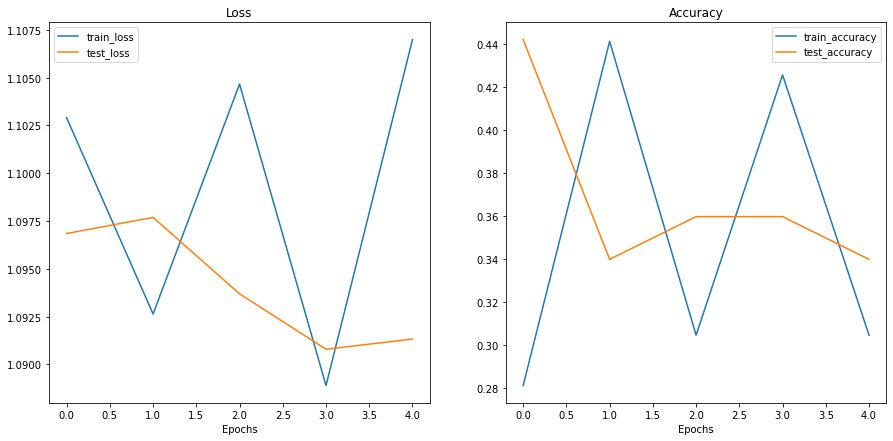

In [118]:
plot_loss_curves(model_0_results)

## TK - Model 1: TinyVGG with Data Augmentation

In [119]:
train_transform_random = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandAugment(num_ops=1, magnitude=5),
    transforms.ToTensor() 
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [120]:
# Load data
train_data_random = datasets.ImageFolder(train_dir, transform=train_transform_random)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# Turn data into DataLoaders
import os
NUM_WORKERS = os.cpu_count()
train_dataloader_random = DataLoader(train_data_random, 
                                     batch_size=32, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)
test_dataloader = DataLoader(test_data_simple, 
                            batch_size=32, 
                            shuffle=False, 
                            num_workers=NUM_WORKERS)

train_dataloader_random, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f45e822caf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f45f3401730>)

In [121]:
model_1 = TinyVGG(input_size=3,
    hidden_units=10,
    output_shape=10).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=10, bias=True)
  )
)

In [122]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

In [123]:
# Train
torch.manual_seed(42) 
torch.cuda.manual_seed(42)
from timeit import default_timer as timer 
start_time = timer()
epochs = 5
model_1_results = train(model=model_1, 
    train_dataloader=train_dataloader_random,
    test_dataloader=test_dataloader,
    optimizer=torch.optim.Adam(model_1.parameters(), lr=0.001),
    epochs=5,
    loss_fn=nn.CrossEntropyLoss())
end_time = timer()
print(f"Total training time: {end_time-start_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.9952 | train_acc: 0.3828 | test_loss: 1.5658 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.2526 | train_acc: 0.4258 | test_loss: 1.1937 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.1633 | train_acc: 0.3008 | test_loss: 1.1045 | test_acc: 0.2708
Epoch: 4 | train_loss: 1.1097 | train_acc: 0.3164 | test_loss: 1.1327 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.1251 | train_acc: 0.3047 | test_loss: 1.1499 | test_acc: 0.2396
Total training time: 5.126404454931617


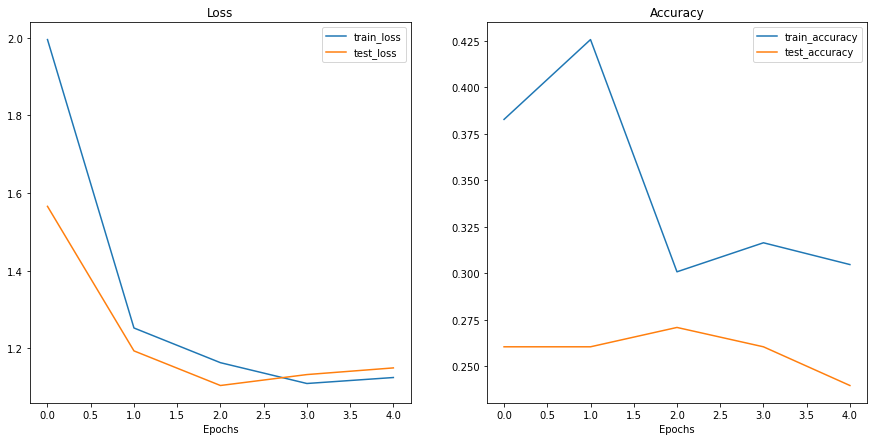

In [124]:
plot_loss_curves(model_1_results)

## TK - Compare model results

In [125]:
model_0_results, model_1_results

({'train_loss': [1.1029032319784164,
   1.092640221118927,
   1.1046645641326904,
   1.0889004617929459,
   1.1069934219121933],
  'train_acc': [0.28125, 0.44140625, 0.3046875, 0.42578125, 0.3046875],
  'test_loss': [1.096849838892619,
   1.0976927280426025,
   1.0936955610911052,
   1.0907979011535645,
   1.091331164042155],
  'test_acc': [0.44223484848484845,
   0.33996212121212127,
   0.35984848484848486,
   0.35984848484848486,
   0.33996212121212127]},
 {'train_loss': [1.99515700340271,
   1.2526291981339455,
   1.16331048309803,
   1.1097131371498108,
   1.125089943408966],
  'train_acc': [0.3828125, 0.42578125, 0.30078125, 0.31640625, 0.3046875],
  'test_loss': [1.5657864809036255,
   1.1936676700909932,
   1.1045462687810261,
   1.1326958735783894,
   1.1498500108718872],
  'test_acc': [0.2604166666666667,
   0.2604166666666667,
   0.2708333333333333,
   0.2604166666666667,
   0.23958333333333334]})

## TK - Exercises

* Try a bigger model (more layers/hidden units) -> double the model
* Try a bigger dataset (double the data) -> double the data
* Try a different transform -> double the image size 
* What do all of these do?

## TK - Extra-curriculum

* TorchData is in beta, check it out for future data pipelines - https://pytorch.org/data/beta/index.html